In [1]:
%matplotlib inline

# Un vistazo a los datos
Vamos a cargar el vector de características.

In [2]:
from dns_attacks_detection import *

In [3]:
try:
    dns = joblib.load('./vectors/EntropyAndRatiosFV_15NOV.pkl')
except FileNotFoundError:
    dns_exf = create_feature_vector_from_log_file('15NOV_Exf.log', extract_features_entropy_and_ratios)
    dns_tunn = create_feature_vector_from_log_file_tunnelling('15NOV_Tunn.log', extract_features_entropy_and_ratios)
    dns = pd.concat([dns_exf, dns_tunn], ignore_index=True)
    joblib.dump(dns, './vectors/EntropyAndRatiosFV_15NOV.pkl')

In [4]:
dns.head()

,attack,chars,digits,entropy,longest_chars,longest_digits,longest_meaningful,symbols
0,0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
1,0,0.666667,0.333333,0.528321,0.666667,0.333333,0.333333,0.0
2,0,1.000000,0.000000,0.401051,1.000000,0.000000,0.857143,0.0
3,0,0.000000,1.000000,0.500000,0.000000,1.000000,0.000000,0.0
4,0,1.000000,0.000000,0.298747,1.000000,0.000000,1.000000,0.0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66237 entries, 0 to 66236
Data columns (total 8 columns):
attack                66237 non-null int64
chars                 66237 non-null float64
digits                66237 non-null float64
entropy               66237 non-null float64
longest_chars         66237 non-null float64
longest_digits        66237 non-null float64
longest_meaningful    66237 non-null float64
symbols               66237 non-null float64
dtypes: float64(7), int64(1)
memory usage: 4.0 MB


In [6]:
dns.describe()

,attack,chars,digits,entropy,longest_chars,longest_digits,longest_meaningful,symbols
count,66237.000000,66237.000000,66237.000000,66237.000000,66237.000000,66237.000000,66237.000000,66237.000000
mean,0.237994,0.758232,0.239646,0.349015,0.727040,0.205496,0.498732,0.002123
std,0.425859,0.352308,0.352731,0.144014,0.381661,0.327710,0.354117,0.017798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.270969,0.375000,0.000000,0.142857,0.000000
50%,0.000000,1.000000,0.000000,0.360234,1.000000,0.000000,0.500000,0.000000
75%,0.000000,1.000000,0.500000,0.500000,1.000000,0.333333,0.800000,0.000000
max,1.000000,1.000000,1.000000,0.528321,1.000000,1.000000,1.000000,0.250000


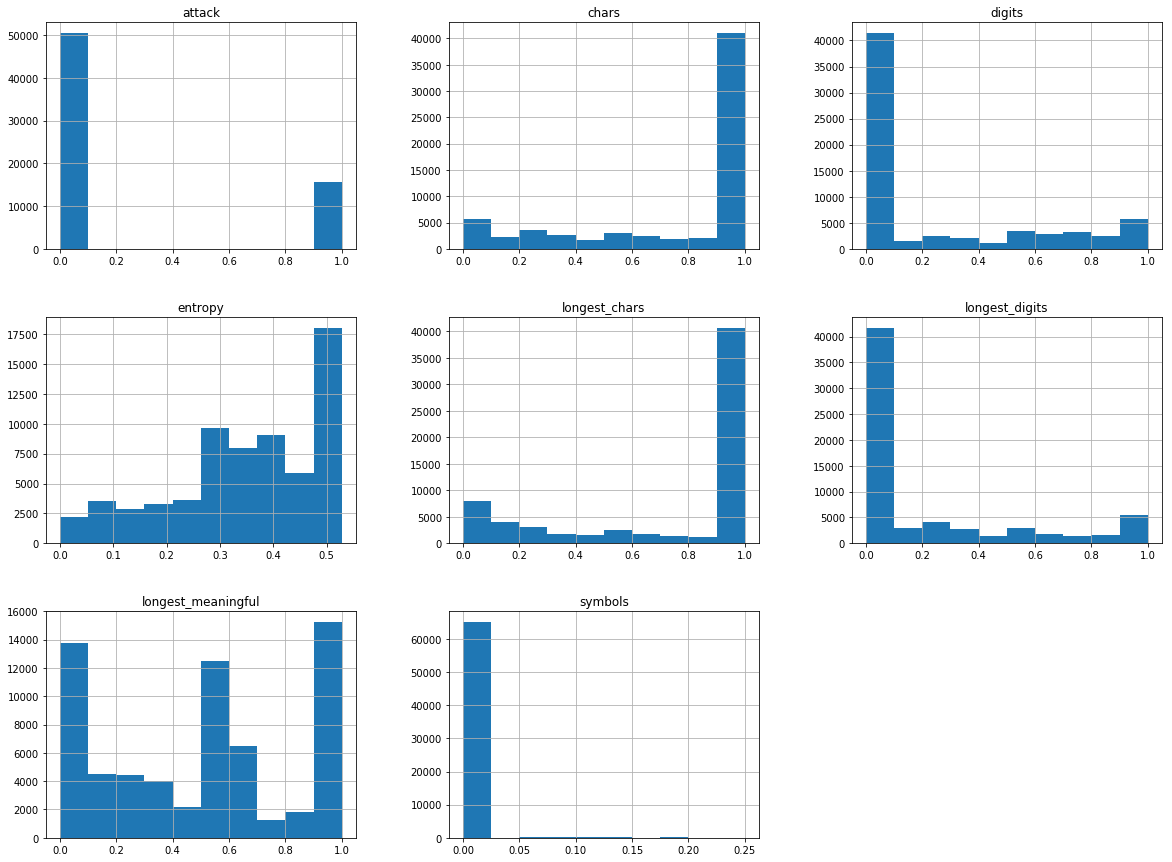

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
train_set, test_set = split_train_and_test_sets(dns, 'attack')

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.762007
1    0.237993
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.762002
1    0.237998
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack                1.000000
digits                0.509387
longest_digits        0.365384
symbols               0.043783
chars                -0.512202
entropy              -0.554315
longest_chars        -0.595368
longest_meaningful   -0.597302
Name: attack, dtype: float64

# Seleccionar y entrenar un modelo

In [13]:
features = train_set.drop('attack', 1)
features

,chars,digits,entropy,longest_chars,longest_digits,longest_meaningful,symbols
25768,1.000000,0.000000,0.264644,1.000000,0.000000,0.600000,0.000000
37417,0.454545,0.545455,0.264907,0.272727,0.272727,0.181818,0.000000
31869,0.102564,0.897436,0.074200,0.051282,0.820513,0.025641,0.000000
29250,0.222222,0.777778,0.121773,0.222222,0.777778,0.074074,0.000000
5628,1.000000,0.000000,0.528321,1.000000,0.000000,0.666667,0.000000
41523,1.000000,0.000000,0.319716,1.000000,0.000000,0.500000,0.000000
10726,0.437500,0.562500,0.203125,0.437500,0.562500,0.062500,0.000000
17188,1.000000,0.000000,0.233793,1.000000,0.000000,0.333333,0.000000
41428,0.666667,0.333333,0.528321,0.666667,0.333333,0.333333,0.000000
17725,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [14]:
labels = train_set['attack']
labels

25768    0
37417    1
31869    1
29250    1
5628     0
41523    0
10726    1
17188    0
41428    0
17725    0
65197    1
20717    1
53768    0
63042    0
29075    0
38131    0
26017    0
10373    0
1100     0
16296    1
567      0
31346    0
59417    1
49793    0
2513     0
4714     0
26685    1
64763    0
8125     0
52343    0
        ..
22342    0
49929    0
34239    0
11798    0
10335    0
18409    0
10508    0
44793    0
25587    0
13502    0
34742    0
3059     0
59818    0
39518    0
17776    0
469      0
60297    1
25319    0
15151    0
9756     0
49333    1
12706    0
63567    0
48725    0
30374    0
41245    0
11775    0
13316    0
16502    0
35439    0
Name: attack, Length: 52989, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [15]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=13, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 1 1 1 0 0 1 0 0 0]
Labels: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [17]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [18]:
confusion_matrix(labels, train_predicted_labels)

array([[38576,  1802],
       [ 1422, 11189]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [19]:
precision_score(labels, train_predicted_labels)

0.86128858440458778

In [20]:
recall_score(labels, train_predicted_labels)

0.88724129728015222

In [21]:
f1_score(labels, train_predicted_labels)

0.87407233809858609

### Análisis

Obtengamos la puntuación que el clasificador SGD da a todas las predicciones.

In [22]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method='decision_function')

In [23]:
labels_scores

array([-2.2149204 ,  3.12781604,  1.81944442, ..., -2.75623163,
       -4.43636579, -6.38211809])

Las puntuaciones viven entre los valores -4.62 y 5.03:

In [24]:
labels_scores.min()

-7.3677165151186639

In [25]:
labels_scores.max()

8.4709167190606003

Tracemos la curva de precisión vs. exhaustividad.

In [26]:
precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

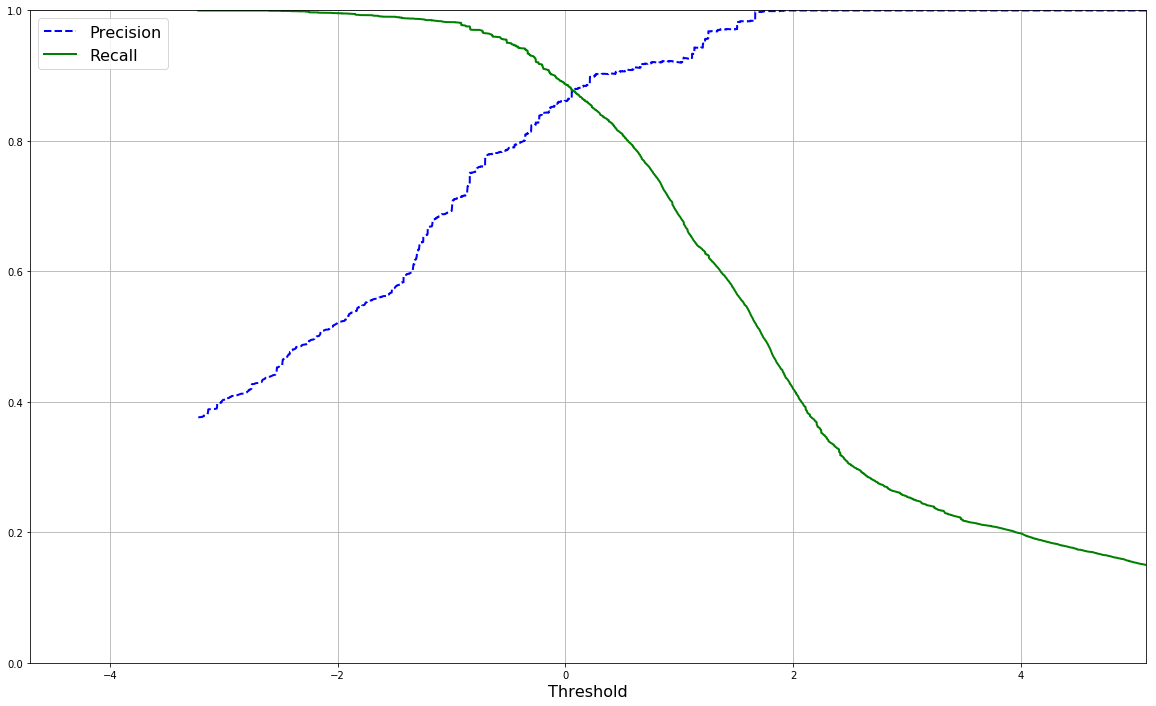

In [27]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-4.7, 5.1])
plt.show()

Con un valor cercano a -1 de umbral parece dar un resultado aceptable de precisión/exhaustividad:

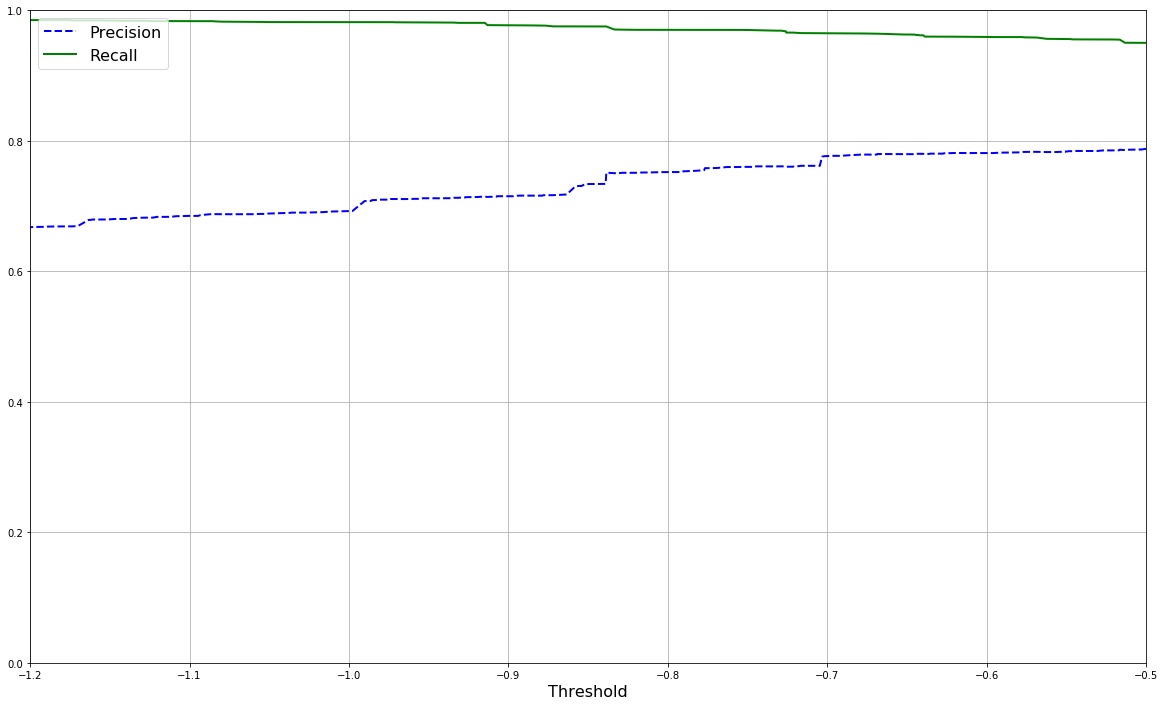

In [28]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.2, -0.5])
plt.show()

In [29]:
labels_train_pred_70 = (labels_scores > -0.98)

In [30]:
confusion_matrix(labels, labels_train_pred_70)

array([[35319,  5059],
       [  225, 12386]])

In [31]:
precision_score(labels, labels_train_pred_70)

0.71000286615075958

In [32]:
recall_score(labels, labels_train_pred_70)

0.98215843311394813

In [33]:
f1_score(labels, labels_train_pred_70)

0.82419483630556301

## Logistic Regression classifier

In [34]:
log_reg_clf = LogisticRegression(random_state=13, solver='liblinear')
log_reg_clf.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
print("Predictions:", log_reg_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 1 1 1 0 0 1 0 0 0]
Labels: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [36]:
train_predicted_labels = cross_val_predict(log_reg_clf, features, labels, cv=5)

In [37]:
confusion_matrix(labels, train_predicted_labels)

array([[39067,  1311],
       [ 1835, 10776]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [38]:
precision_score(labels, train_predicted_labels)

0.89153636137999503

In [39]:
recall_score(labels, train_predicted_labels)

0.85449211006264369

In [40]:
f1_score(labels, train_predicted_labels)

0.87262126487974734

### Análisis

## Support Vector Machines

* ## Con Polynomial Kernel

In [41]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=3, coef0=1, C=5)
svm_clf_poly.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
print("Predictions:", svm_clf_poly.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 1 1 1 0 0 1 0 0 0]
Labels: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [43]:
train_predicted_labels = cross_val_predict(svm_clf_poly, features, labels, cv=5)

In [44]:
confusion_matrix(labels, train_predicted_labels)

array([[40166,   212],
       [  953, 11658]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [45]:
precision_score(labels, train_predicted_labels)

0.98213984835720303

In [46]:
recall_score(labels, train_predicted_labels)

0.924431052255967

In [47]:
f1_score(labels, train_predicted_labels)

0.95241207467015232

### Análisis

* ## Con Gaussian RBF Kernel

In [48]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13, gamma=5, C=5)
svm_clf_rbf.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print("Predictions:", svm_clf_rbf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 1 1 1 0 0 1 0 0 0]
Labels: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [50]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, features, labels, cv=5)

In [51]:
confusion_matrix(labels, train_predicted_labels)

array([[40353,    25],
       [  707, 11904]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [52]:
precision_score(labels, train_predicted_labels)

0.99790426691256606

In [53]:
recall_score(labels, train_predicted_labels)

0.94393783205138371

In [54]:
f1_score(labels, train_predicted_labels)

0.9701711491442544

### Análisis

## Decision Trees

In [55]:
tree_clf = DecisionTreeClassifier(random_state=13)
tree_clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [56]:
print("Predictions:", tree_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 1 1 1 0 0 1 0 0 0]
Labels: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [57]:
train_predicted_labels = cross_val_predict(tree_clf, features, labels, cv=5)

In [58]:
confusion_matrix(labels, train_predicted_labels)

array([[40316,    62],
       [  154, 12457]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [59]:
precision_score(labels, train_predicted_labels)

0.99504752775780814

In [60]:
recall_score(labels, train_predicted_labels)

0.98778843866465782

In [61]:
f1_score(labels, train_predicted_labels)

0.99140469558296851

### Análisis

## K-Nearest-Neighbors

In [62]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
print("Predictions:", knn_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 1 1 1 0 0 1 0 0 0]
Labels: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [64]:
train_predicted_labels = cross_val_predict(knn_clf, features, labels, cv=5)

In [65]:
confusion_matrix(labels, train_predicted_labels)

array([[40271,   107],
       [  139, 12472]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [66]:
precision_score(labels, train_predicted_labels)

0.99149375944033702

In [67]:
recall_score(labels, train_predicted_labels)

0.98897787645706126

In [68]:
f1_score(labels, train_predicted_labels)

0.99023421992854299

### Análisis

# Afinación de Modelos

# Ensemble Learning

Debido a que ya hemos estrechado nuestras opciones con respecto a qué modelos usar y hemos ajustado los modelos más prometedores, ahora podemos probar a combinar varios modelos para ver si al ser usados conjuntamente, aumenta su rendimiento.

## Modelos Elegidos

Elegiremos los modelos con los siguientes parámetros:
- Support Vector Machines (Gaussian RBF Kernel): {'C': 10, 'gamma': 50}. Exhaustividad: 0.89.
- Decision Trees: {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 12}. Exhaustividad: 0.90.
- K-Nearest-Neighbors: parámetros por defecto ({'n_neighbors': 5, 'weights': 'uniform'}). Exhaustividad: 0.91.

In [69]:
svm_clf_rbf_tuned = SVC(kernel='rbf', random_state=13, gamma=50, C=10)
svm_clf_rbf_tuned.fit(features, labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
tree_clf_tuned = DecisionTreeClassifier(random_state=13, max_depth=7, min_samples_leaf=8, min_samples_split=12)
tree_clf_tuned.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [71]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Voting Classifiers

Usa la técnica de agregar las predicciones de diferentes clasificadores seleccionando la clase que obtiene más votos.

### SVM + Decision Tree + KNN

In [72]:
voting_clf_s_d_k = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('dt', tree_clf_tuned), ('knn', knn_clf)], voting='hard')
voting_clf_s_d_k.fit(features, labels)

VotingClassifier(estimators=[('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [73]:
train_predicted_labels = cross_val_predict(voting_clf_s_d_k, features, labels, cv=5)

In [74]:
confusion_matrix(labels, train_predicted_labels)

array([[40289,    89],
       [  249, 12362]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [75]:
precision_score(labels, train_predicted_labels)

0.99285197976066175

In [76]:
recall_score(labels, train_predicted_labels)

0.98025533264610265

In [77]:
f1_score(labels, train_predicted_labels)

0.98651344665230234

### Decision Tree + KNN

In [78]:
voting_clf_d_k = VotingClassifier(
    estimators=[('dt', tree_clf_tuned), ('knn', knn_clf)], voting='soft')
voting_clf_d_k.fit(features, labels)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=12,
            min_weight_fraction_leaf=0...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [79]:
train_predicted_labels = cross_val_predict(voting_clf_d_k, features, labels, cv=5)

In [80]:
confusion_matrix(labels, train_predicted_labels)

array([[40298,    80],
       [  154, 12457]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [81]:
precision_score(labels, train_predicted_labels)

0.99361888809124987

In [82]:
recall_score(labels, train_predicted_labels)

0.98778843866465782

In [83]:
f1_score(labels, train_predicted_labels)

0.99069508509623039

## Random Forests

La técnica anterior se sirve de varios algoritmos para realizar predicciones, utilizando el mismo conjunto de datos de aprendizaje. Otras técnicas de "ensemble learning" son "bagging" y "pasting". Éstas consisten en entrenar el mismo algoritmo pero con distintos subconjuntos de los datos de entrenamiento.

"Bagging" y "pasting" permiten que las instancias de entrenamiento sean usadas varias veces por diferentes predictores, pero solo "bagging" permite que una instancia sea usada varias veces por el mismo predictor. Son usadas mayormente con árboles de decisión, aunque se pueden usar con cualquier tipo de modelo. En este caso usaremos árboles de decisión creando el enfoque llamado "random forests".

In [84]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
rnd_clf.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [85]:
train_predicted_labels = cross_val_predict(rnd_clf, features, labels, cv=5)

In [86]:
confusion_matrix(labels, train_predicted_labels)

array([[40307,    71],
       [  449, 12162]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [87]:
precision_score(labels, train_predicted_labels)

0.99419602713970412

In [88]:
recall_score(labels, train_predicted_labels)

0.96439616208072321

In [89]:
f1_score(labels, train_predicted_labels)

0.97906939301239737

## Extremely Randomized Trees

Una técnica muy similar a "random forests" pero añade más aleatoriedad ya que la elección de los umbrales para cada característica se realiza de forma aleatoria.

In [90]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
extra_clf.fit(features, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [91]:
train_predicted_labels = cross_val_predict(extra_clf, features, labels, cv=5)

In [92]:
confusion_matrix(labels, train_predicted_labels)

array([[40307,    71],
       [  710, 11901]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [93]:
precision_score(labels, train_predicted_labels)

0.99406949548947543

In [94]:
recall_score(labels, train_predicted_labels)

0.94369994449290306

In [95]:
f1_score(labels, train_predicted_labels)

0.9682300776959688

# Evaluar los Modelos con el "Test Set"

Después de probar varios modelos, seleccionar los mejores, ajustarlos y comprobar cómo funcionan cuando son combinados, podemos analizar su rendimiento usando el conjunto de datos que apartamos al principio como "test set". Los modelos nunca han visto esos datos, por lo tanto podemos ver como reaccionan con nuevos datos.

In [96]:
features_test = test_set.drop('attack', 1)

In [97]:
labels_test = test_set['attack']

## Support Vector Machines (Gaussian RBF Kernel)

In [98]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    svm_clf_rbf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.996455043506 
Recall:  0.98065334602 
F1:  0.988491048593


## Decision Trees

In [99]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    tree_clf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.999020248204 
Recall:  0.970187123375 
F1:  0.984392598552


## K-Nearest-Neighbors

In [100]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    knn_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.993606138107 
Recall:  0.985727878211 
F1:  0.989651329406


## SVM + Decision Tree + KNN

In [101]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_s_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.999027237354 
Recall:  0.977164605138 
F1:  0.987974987975


## Decision Tree + KNN

In [102]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.99360409338 
Recall:  0.985410719949 
F1:  0.98949044586


## Random Forests

In [103]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    rnd_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.995746073298 
Recall:  0.965112591183 
F1:  0.980190046706


## Extremely Randomized Trees

In [104]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    extra_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.995666666667 
Recall:  0.947351728513 
F1:  0.970908499919


In [105]:
directory = './models/extract_features_entropy_and_ratios/'
joblib.dump(voting_clf_d_k, directory + 'tunn_decision_trees+knn.pkl')
joblib.dump(knn_clf, directory + 'tunn_knn.pkl')
joblib.dump(voting_clf_s_d_k, directory + 'tunn_svm+decision_trees+knn.pkl')
joblib.dump(svm_clf_rbf_tuned, directory + 'tunn_svm_rbf.pkl')

['./models/extract_features_entropy_and_ratios/tunn_decision_trees+knn.pkl']